# Handson 07: Caracterização de variáveis aleatórias (PDF e CDF), Metodologia de Monte Carlo e Teorema Central do Limite


# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre parte da taxonomia associada a modelagem de fenômenos aleatórios;
- Entender características essenciais relacionadas a técnica de Monte Carlo;
- Entender características essenciais do Teorema do Limite Central (ou Teorema Central do Limite);
- Praticar os conceitos com protótipos em Matlab e Python.


# Variáveis aleatórias 

Estamos muito acostumados a modelar fenômenos determinísticos, pois isso é assunto de nossos estudos desde o ensino médio. Equações de Newton, Equações de Maxwell, Lei de Ohm, Transformada de Fourier são exemplos de formulações determinísticas que são utilizadas na engenharia para construção de dispositivos úteis para humanidade. Geralmente, a modelagem deterministica de um fenômeno físico se remete a uma função que tem uma fórmula fechada, relacionando parâmetros de entrada (entrada númerica) a uma representação númerica de saída. Um exemplo clássico é a fórmula que relaciona velocidade, espaço e tempo:

$$ S = f\left( S_o, v, t\right) \Rightarrow S = S_o + vt$$

Isso significa que sempre que tivermos valores específicos de  $S_o$, $v$ e $t$, vamos obter exatamente o mesmo valor de $S$.

Contudo, para a população em geral, a familiaridade com a modelagem de fenômenos aleatórios não é comum e surgem as seguintes perguntas:
- **Existe uma função para modelar fenômenos aleatórios?**
- **Essa função tem uma fórmula?**
- **Essa formulação depende de parâmetros?**
- **De posse desses parâmetros, é possível gerar as saídas de esperimentos aleatórios em um computador?**

A resposta para todas essas perguntas é **sim** e, por isso, precisamos entender minimamente a taxonomia associada a modelagem de fonômenos aleatórios. Começamos por definir os elementos essenciais de um **modelo probabilístico**.

### Modelo probabilístico

Vamos definir os ingredientes essenciais de um modelo matemático para um experimento aleatório. Um deles é a multiplicidade de resultados possíveis. Isto será indicado por um conjunto $\Omega$ não vazio (e tipicamente não unitário), que chamaremos de **espaço amostral**.

Outros ingredientes importantes são as probabilidades $\mathbb{P}$, que em princípio devem ser atribuídas aos resultados possíveis (na linguagem do modelo, aos pontos de $\Omega$).  Assim, $\mathbb{P}$($i$) é a probabilidade de (sair) $i$ como resultado do experimento aleatório. Por exemplo, no experimento aleatório de observar a saída númerica de um lançamento de dado, temos:

$$\Omega = \{ 1, 2, 3, 4, 5, 6 \}.$$
e
$$\mathbb{P}(1)=\mathbb{P}(2)=\mathbb{P}(3)=\mathbb{P}(4)=\mathbb{P}(5)=\mathbb{P}(6)=\frac{1}{6}.$$

Nesse exemplo, como o dado é equilibrado, nenhum valor teria mais chance de sair do que os outros. Observa-se que as frequências relativas de 1, 2, 3, 4, 5 ou 6 se aproximam de 1/6, conforme o número de lançamento de dados vai aumentando. Assim, outro ingrediente importante do modelo de probabilidade é a **Função Massa de Probabilidade (Probability Mass Function - PMF)**. Ela é uma função que associa a cada possível ocorrência de uma variável aleatória discreta uma probabilidade. 

De forma mais geral, pode ocorrer de uma atribuição de probabilidades aos pontos de $\Omega$ **não fazer muito sentido ou não ser o suficiente** . Por exemplo, um experimento aleatóio razoavelmente familiar (bastante, bastante para quem faz simulações) é:

>  Escolha ao acaso e de maneira uniforme um número do intervalo [0, 1]. A uniformidade implica que, de certa forma, cada resultado possível deve ter a mesma probabilidade 1/$N$, sendo $N$ o número de elementos possíveis. Mas não podemos atribuir probabilidade igual a todos os pontos de $\Omega$ = [0, 1], já que há um infinito contínuo
de possibilidades, sem que essa probabilidade seja zero ($N$ é infinito). E mesmo fazendo isto, esta atribuição é insuficiente.

Uma maneira mais adequada de fazer a atribuição neste caso é, por exemplo, atribuir probabilidades aos intervalos. Da uniformidade, seria natural impor que para todo subintervalo $I$ de [0, 1], $\mathbb{P}$($I$) = comprimento de $I$, sendo que $\mathbb{P}$($I$) significa probabilidade de (o número escolhido pertencer à $I$. Note que neste caso a probabilidade de um ponto é igual ao seu comprimento, que se anula.

Note ainda no exemplo acima que não basta atribuir probabilidades aos pontos de $\Omega$: é necessário considerarmos subconjuntos adequados, no caso, os intervalos.


Então, em um modelo probabilístico, as probabilidades são atribuidas a subconjuntos de $\Omega$, os **eventos**. No exemplo acima,

$A$ = [0, 1/2] é um **evento**, que ocorre se o número escolhido for menor ou igual a 1/2.

Dessa forma, outro elemento importante em um modelo de probabilidade é o **espaço de eventos**, que vamos denotar por $\varepsilon$. Ele é o conjunto (ou classe) de eventos que queremos considerar (e atribuir probabilidades). Para esses eventos devemos consider operações (entre eventos) que deverá ser rica o suficiente para, a ser aplicadas a eventos da classe, o resultado deve ser um evento da classe. As operações são:
1. Com dois eventos: intersecção (ocorrência simultênea); união (ocorrência alternativa);
2. Com um evento: complementação (não ocorrência).

No exemplo do dado, uma classe de eventos natural é o conjunto das partes de $\Omega$ = {1, 2, 3, 4, 5, 6}, isto é, todos os subconjuntos de {1, 2, 3, 4, 5, 6}:

$\varepsilon$ = {$\varnothing$, {1}, {2}, . . . , {6}, {1, 2}, . . ., {1, 6},
{2, 3}, . . . , {2, 6}, . . . , {6, 6}, {1, 2, 3}, . . ., $\Omega$}.

Os subconjuntos $\varnothing$ e $\Omega$ também são eventos: o evento nulo ou impossível,
e o evento total ou certo, respectivamente. Eles sempre estarão em $\varepsilon$.


Para o exemplo de uma VA contínua (escolha ao acaso e de maneira uniforme de um número do intervalo [0, 1]), uma classe de eventos adequada não é simples de descrever, pois o conjunto das partes de [0, 1] é grande demais. Mas
não nos preocuparemos com isto neste experimento, e apenas diremos que neste caso $\varepsilon$ deve conter todos os intervalos de $\Omega$ (incluindo os de comprimento $\varnothing$, os conjuntos unitários e o conjunto vazio) e uniões de tais intervalos.

Se o leitor quiser se aprofundar e vê mais exemplos sobre os conceitos acima, sugerimos o [seguinte material.](https://www.ime.usp.br/~lrenato/cap3.pdf)

### Variável Aleatória

Partindo do modelo de probabilidade exposto, e respondendo uma das perguntas enumeradas anteriormente, nos deparamos com o conceito é de **Variável Aleatória (VA)**. Similar a modelagem determinística, a VA é a **função** que associa a realização do experimento aleatório (elementos do espaço amostral) ao conjunto de números reais. Assim, respondemos a primeira pergunta:

- **Existe uma função para modelar fenômenos aleatórios?** Resposta:Sim. A função é chamada de **Variável Aleatória (VA)**.

Mais formalmente:

> Dado um experimento aleatório, descrito pelo espaço de probabilidades ($\Omega$, $\varepsilon$, $\mathbb{P}$), uma função numérica $X$: $\Omega \rightarrow \mathbb{R}$ será dita uma **Variável Aleatória** (do experimento).

Por exemplo, $X$ = **número que aperece da face do dado lançado** é uma variável aleatória. Mais precisamente, $X$ : $\Omega$ = {1, 2, . . . , 6} $\rightarrow \mathbb{R}$ tal que $X(ω) = ω$ é uma função numérica do experimento, e logo é uma variável aleatória.

No outro exemplo, $X$ = **número escolhido** é uma variável aleatória. Neste caso, $X$ : $\Omega$ = [0, 1] $\rightarrow \mathbb{R}$  tal que $X(ω) = ω$.

### Distribuição de probabilidades de variáveis aleatórias

Similar ao exposto no momento da definição do modelo probabilístico, podemos caracterizar uma VA por meio de sua distriuição de probabilidades, i.e., definindo as probabilidades dos diversos eventos envolvendo tais
variáveis. De maneira similar ao exposto anteiormente, temos o caso discreto e o caso contínuo.

**VA discreta:**

Quando o conjunto de valores possíveis de uma VA $X$ for finito ou infinito enumerável (contável), como no exemplo do dado, em que ele é finito, dizemos que $X$ é uma VA discreta. Neste caso, sendo $\nu_X = \{x_i, i = 1, 2, ...\}$ o conjunto de valores, então se tivermos as probabilidades de todos os eventos $\{X = x_i\}, i = 1, 2, ...$, (que
diremos unitários), então, pela aditividade da probabilidade, podemos obter as probabilidades de eventos compostos  $\{X ≤ w\}$, $\{X > z\}$, com $w$, $z$ sendo números arbitrários:

$$\mathbb{P}(X \leq w) = \sum_{i: x_i\leq w}\mathbb{P}\left (X = x_i\right ), \; \mathbb{P}(X > z) = \sum_{i: x_i> z}\mathbb{P}\left (X = x_i\right )$$

No exemplo do dado, a distribuição (de probabilidades) de X é dada por $\mathbb{P}(X = i) = \frac{1}{6}$, $i$ = 1, . . . , 6. Como definido anterioremente, essa **Distribuição de Probabilidade Discreta** é representada pela  ** Função Massa de Probabilidade (Probability Mass Function - PMF)**.

**VA contínua:**

No caso em que $\nu_X$ for um conjunto infinito não enumerável (contável), em geral não é suficiente obter as probabilidades dos eventos unitários $\{X = x\}$, $x \in \nu_X$ (probabilidades nulas). Neste caso, para caracterizar a distribuição de probabilidades de $X$ é suficiente termos as probabilidades dos eventos $\{X \in I\}$, sendo $I$ um intervalo arbitrário. Tais probabilidades serão dadas por **Funções de Densidade de Probabilidade (PDF)**  $f_X$. Assim, podemos escrever que existe uma função $f_X$: $\mathbb{R} \rightarrow  [0, \infty)$, tal que:

$$\mathbb{P}(a < X < b) = \int_a^b f_X(x) dx, \forall \; a,\; b \in R, \; {\rm com} \; a \leq b.$$

No outro exemplo, $X$ : $\Omega$ = [0, 1] $\rightarrow \mathbb{R}$  tal que $X(ω) = ω$:

$$\mathbb{P}(a < X < b) = (b\wedge 1)−(a \vee 0),$$

sendo que $\wedge$ e $\vee$ indica o máximo e mínimo, respectivamente. Concluímos que a PDF de $X$ é: 


$$f_X(x)=\left\{\begin{matrix}
1, & {\rm \; se \;} 0 \leqslant  x \leqslant 1
\\ 
0, & {\rm \; caso \; contrário}
\end{matrix}\right.$$
  
Assim, na descrição da distribuição de uma VA contínua é suficiente considerarmos intervalos $I$ semiinfinitos $(−\infty, a]$.

Algumas proriedades das PDFs podem ser escritas, entre elas:

$$ f(x)\geq 0  {\rm \; para \;todo \;} x \in\mathbb{R} $$

$$ \int_{-\infty}^\infty f(x)dx=1 $$

$$\mathbb{P}(c < X < d)=\int_{c}^{d} f(x)dx	$$

$$ \mathbb{P}(X=c)=\displaystyle \int_{c}^{c} f(x)dx=0 $$


Se o leitor quiser se aprofundar e vê mais exemplos sobre os conceitos acima, sugerimos o [seguinte material.](https://www.ime.usp.br/~lrenato/cap4.pdf)

### Função distribuição cumulativa (CDF)

Dada a variável aleatória $X$, sua CDF é a função $F_X$ : $\mathbb{R} \rightarrow [0, 1]$, tal que para todo $x \in \mathbb{R}$

$$ F(x) = P(X \leq x ) = \int_{-\infty}^{x} f_X(s)ds $$

Se $X$ for uma VA discreta, a CDF é:

$$ F(x)=\sum_{i} P(x_{i}),$$

para todo $i$ em que $x_{i}\leq x $.

No caso de VAs discretas, a CDF é do tipo escada (constante por partes, com saltos). Para VAs contínuas, a CDF é contínua.  

No exemplo do lançamento do dado, a CDF é como mostrada na figura a seguir.

![fig_CDF_VAD](./FIGS/HD_07/CDF_VAD.png)

No outro exemplo, $X$ : $\Omega$ = [0, 1] $\rightarrow \mathbb{R}$, como a PDF é $f_{[0,1]} = 1$, podemos escrever:


$$F_X(x)=\left\{\begin{matrix}
0, & {\rm \; se \;}  x < 0
\\ 
\int_0^x dy, & {\rm \; se \;} 0 \leqslant  x \leqslant 1
\\ 
1 & \; x > 1
\end{matrix}\right.$$

Essa função é ilsutrada na figura a segui.

![fig_CDF_VAC](./FIGS/HD_07/CDF_VAC.png)

Cientista ao longo do tempo tem modelado fênonemos físicos aleatórios por meio de VAs. Gráficos de frequência de ocorrência (histograma), métodos de _curve fitting_, e métodos de aderência tem sido usados para identificar PDFs capazes de representar o comportamento de diversar VAs, como por exemplo:
- VA que modele a oferta de tráfego em uma rede celular;
- VA que modele a mobilidade de usuários de telefonia móvel em uma cidade;
- VA que modele as perdas de propagação em um canal de transmissão;
- VAs que modelem a velocidade e direção do vento em uma turbina de geração eólica;
- VA que modele o aparecimento de usuários em uma fila bancária;
- VA que modelo o surgimente de processos em um processador.

A lista de fênomenos aleatórias é longa, mas existem PDFs bem conhecidas e que modelam uma vasta gama de fênomenos conhecidos. Entre elas:

**Distribuição Exponencial:**

**Distribuição Gaussiana:**

**Distribuição Rayleigh:**

**Distribuição t-student:**

**Distribuição Rice:**

**Distribuição Nakagami:**

No Matlab, usaremos a função $cdfplot()$ para plotar empiricamente função distribuição cumulativa a partir de uma função densidade de probabilidade.

# Prática 01: Geração de variáveis aleatórias

- Variáveis aleatórias
-- Prática 01: Geração de variáveis aleatórias
-- Plotagem da PDF
-- Plotagem da CDF
-- PDF e CDF de distribuições clássicas (exemplos de seu uso).

- Monte Carlo
-- Experimento de estimação do Pi
-- Formulação da taxa de erro (livro do Proakis)

- Teorema do limite central
-- Formulação
-- Experimento Gaussiano

- Projeto
-- Modelo de mobilidade



## Metodologia de Monte Carlo (MMC)

O Método que se baseia em amostragens aleatórias massivas para obter resultados numéricos. Através de um elevado número de repetições sucessivas, calcula probabilidades heuristicamente, tal como se, de fato, se registrassem os resultados reais.
Exemplo: calcular o valor de $\pi$:

**Modelagem:** Considere um círculo de raio $R=5$ inscrito em um quadrado de lado $L=5$. Se analizarmos apenas 1/4 da área do circulo, chegamos à seguinte razão: 

$$ \frac{A_{circulo}} {4} \cdot \frac{1} {A_{Quadrado}}  = \frac{\pi}{4}$$

**a)** Desenhar um quadrado com $1/4$ do circulo inscrito nele.

**b)** Distribuir uniformente objetos pequenos e de tamanho uniforme (Ex. grãos de arroz) no quadrado. 

**c)** Contar o número de objetos dentro do círculo e o número total de objetos.

A razão entre os dois contadores é uma estimativa da razão entre as duas áreas, que multiplicada por 4, dá o valor de $\pi$


Faremos então esse experimento no Matlab para os números de amostras(grãos) $10^{3}, 10^{4}$ e $10^{7}$. Criaremos um vertor com pontos distribuidos aleatoriamente com a função $rand()$ (não tendenciosa). Cada elemento desse vetor deverá ser complexo para que exista duas dimensões. Em seguida faremos o teste para cada amostra (grão) se seu módulo é maior que o raio $R=5$:
$$ABS(x) \leq \sqrt{x_{Real}^{2}+x_{Img}^{2}} $$
Caso positivo, a função retornará 1 e caso negativo a função retornará 0.
Em seguida encontramos apenas o número de elementos dentro da circunferência e dividimos por pela quantidade total de elementos distribuido. O valor final será o resutado de $1/4$ da área do circulo, sendo necessário multiplicar por 4 o valor final pra encontrar a estimação  heurística do valor de $\pi$.

Neste método, chamamos de parâmetro o valor de $\pi$ real e estimador o valor de $\pi_{N}$ em que $N$ é o número de amostras. É esperado que para cada compilação haja uma diferença entre os valores de $\pi$ estimado. Isso ocorre por haver uma distribuição aleatória a qual possui uma certa confiabilidade. 

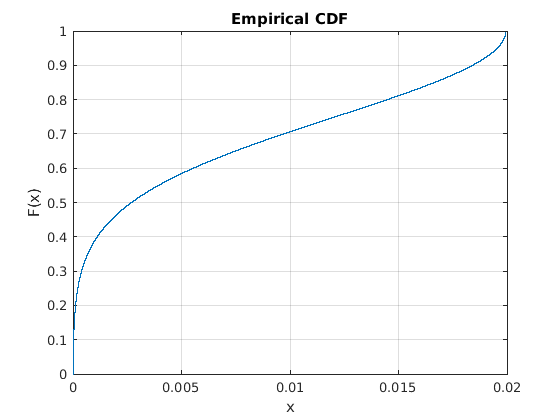

In [5]:
% CDF.m
clc;clear all; close all;
%% Parâmetros
mu=200;                                                 % Média
sigma =20;                                              % Desvio padrâo
T=0.001;                                                % Taxa de amostragem
x=120:T:280;                                            % Eixo x       
DistNorm=normpdf(x,mu,sigma);                           % Distribuição normal    
cdfplot(DistNorm);                                      % Plot da CDF 

Valor real de pi =  3.1416
 ----------------------------------
 - Número de pontos = 1000
 - Razão entre as areas =  0.757
 - pi =  3.028
 - Erro =  0.11359
 ----------------------------------
 - Número de pontos = 10000
 - Razão entre as areas =  0.7856
 - pi =  3.1424
 - Erro =  -0.00080735
 ----------------------------------
 - Número de pontos = 10000000
 - Razão entre as areas =  0.78544
 - pi =  3.1418
 - Erro =  -0.00017335


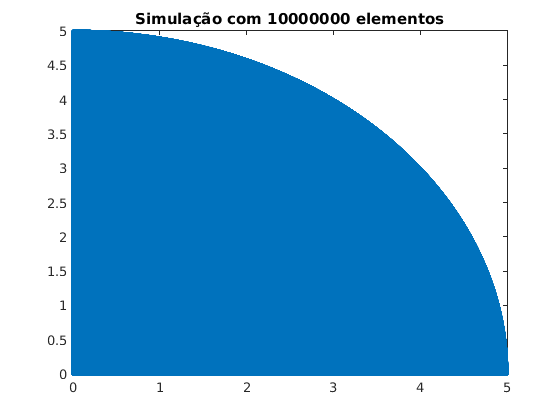

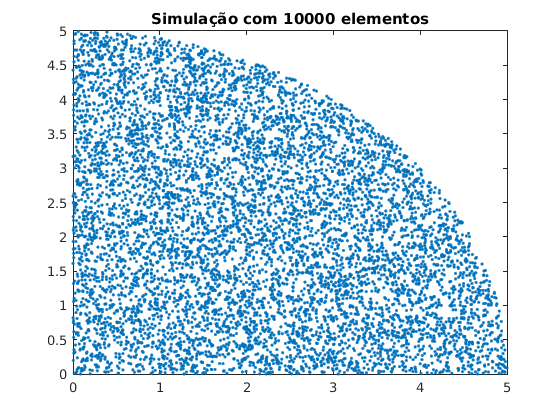

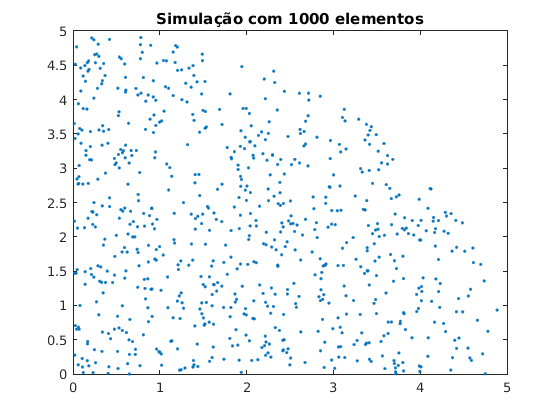

In [3]:
% Estimador_pi.m
clear all;clc;close all;
% Estimar valor de pi através do método de monte carlo
lQuadrado = 5;                                          % Comprimento do quadrado
rCirculo = lQuadrado;                                   % Raio do circulo
vtPontos = [ 1e3 1e4 1e7];                              % Número de precisão
disp([ 'Valor real de pi =  ' num2str(pi)  ]);          % Mostra valor verdadeiro de pi

for nPontos = vtPontos
    % Pocisionar ponto no quadrado: Mutiplicando um número aleatório de 0 a
    % 1 pelo comprimento do quadrado para distribuir aleatoriamente nas
    % duas dimenções.
    vtPontos = lQuadrado*rand(1,nPontos) + i*lQuadrado*rand(1,nPontos);
    % Testa: 
    % Caso o modulo do vetor > raio do circulo --> 0 
    % Caso o modulo do vetor <= raio do circulo --> 1  
    indexPontCirculo = ( abs(vtPontos) <= rCirculo ); 
    % Encontra o numero de elementos dentro da area do circulo.
    razaoArea = length(find(indexPontCirculo))/nPontos;
    % Multiplica por 4 pois foi realizado apenas para 1/4 da area do circulo
    valordePi = 4*razaoArea;
    % Retorna o valor de pi estimado  
          
    disp([ ' ----------------------------------']);
    disp([' - Número de pontos = ' num2str(nPontos)   ]);
    disp([' - Razão entre as areas =  ' num2str(razaoArea)]);
    disp([ ' - pi =  ' num2str(valordePi)  ]);
    disp([ ' - Erro =  ' num2str(pi-valordePi)  ]);  
    
    
    figure
    %% Plota elementos
    vtPontosCirculo = vtPontos(indexPontCirculo); 
    plot(vtPontosCirculo,'.');
    title(['Simulação com ', num2str(nPontos), ' elementos' ])
        
end

## Teorema central do limite
A razão pela qual a distribuição amostral normal ser tão importante é porque qualquer que seja a distriubuição da variavel em grandes amostras, a distribuição das médias amostrais tendem a convergir normalmente conforme o aumento do numero de amostras. Mesmo quando a distribuição da população de eventos não segue uma distribuição Normal, a distribuição da média dos dados converge para a distribuição Normal conforme o tamanho da amostra aumenta.Assim, a aproximação da distribuição Normal com média $ \mu $ e variância ${\sigma^2}$.

Compreende-se como a equação da distribuição normal:

$$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}} \cdot e ^{\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right]}, \quad x\in(-\infty,\infty).	 $$
Em que $\mu$ é a média e $\sigma^{2}$ é a variância da distribuição.
A ditribuição normal tem formato definido semelhante a um sino. Montaremos um exemplo para determinados  $ \mu $ e  ${\sigma^2}$ usando a função  .

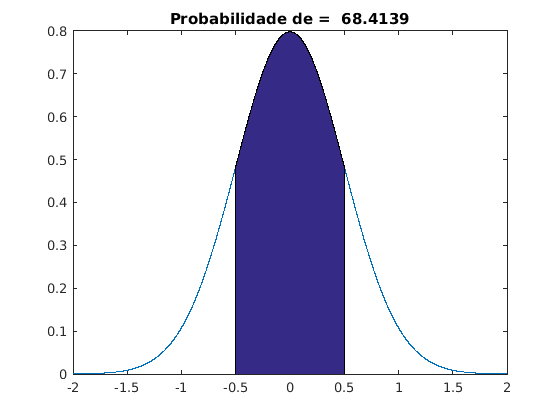

In [5]:
% Distnorm.m
clc;clear all; close all;
%% Parâmetros
mu=0;                                                   % Média
sigma =0.5;                                             % Desvio padrâo
T=0.001;                                                % Taxa de amostragem
x=-2:T:2;                                               % Eixo x       
DistNorm=normpdf(x,mu,sigma);                           % Distribuição normal    
indices = (max(find(x<-sigma)):min(find(x>sigma)));     % Encontra o local que se deseja estimar
prob1=sum(DistNorm(indices))*T*100;                     % Probabilidade de um evento ocorrer no intervalo
plot(x,DistNorm);                                       
title([ 'Probabilidade de =  ' num2str(prob1)  ]);      % Mostra valor verdadeiro de prob1
hold on
area(x(indices),DistNorm(indices))                      % Probabilidade 

Vemos que nossa distribuição está centrada em $ \mu $. Caso quisesse-mos variar $ \mu $, esta se deslocaria para onde determinarmos desde que x esteja definida nela. Já o sigma define a largura dessa distribuição. A área grifada simboliza a probabilidade de um evento ocorrer entre $(-\sigma \leq x \leq \sigma$). 

**Ex:** A vida efetiva de um componente de turbina de avião é de 5000h e desvio-padrão de 40h. A distribuição da vida efetiva é bastante próxima da distribuição normal. Encontrar a probabilidade de que uma determinada amostra tenha vida efetiva maior que 5038h.

$R= 17,1 \%$.Calcua-se a probabilidade de uma amostra possuir a vida útil maior que 5034h pela integral da sua distribuição com x variando de $(5034 \leq x < \infty)$. (prob_ex.m)

O exemplo abaixo trata-se de um lançamento de dados por um número bastante grande de jogadores. Cada jogador tem direito a uma quantidade de jogadas em um dado de 6 faces (6 pontuações) e é tirado a média. Encontrado a média é elaborado o histograma da distribuição de frequência da média.

 
 Para 2 Jogadas
 Tempo com for = 0.035125s
 Tempo sem for = 0.002014s
 Razão = 17.4404 vezes
 
 Para 50 Jogadas
 Tempo com for = 0.074519s
 Tempo sem for = 0.01771s
 Razão = 4.2077 vezes
 
 Para 100 Jogadas
 Tempo com for = 0.15177s
 Tempo sem for = 0.025305s
 Razão = 5.9977 vezes
 
 Para 200 Jogadas
 Tempo com for = 0.4888s
 Tempo sem for = 0.044249s
 Razão = 11.0467 vezes


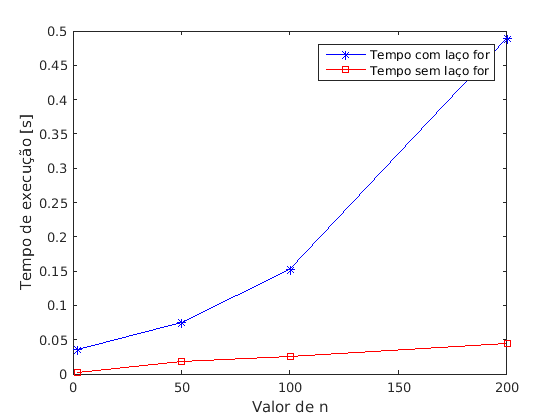

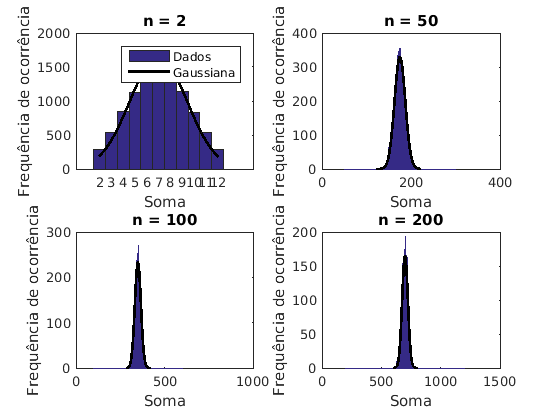

In [1]:
% TLC.m
clear all;close all;clc;
%% Parâmetros
% Esse experimento é feito com um dado de 6 faces (6 pontuações de 1 a 6).
% Monta-se um vetor com cada jogada para que possa fazer um laço for com
% cada elemento.
Jogadas = [2 50 100 200];                 % Número de jogadas do dado
Jogadores = 10000;

%% Simulando as jogadas
% Faremos aqui a criação das jogadas para cada jogador. Montaremos uma
% matriz em que as linhas representarão os resultados e as colunas
% representarão os jogadores. Em seguida será calculado a pontuação de cada
% jogador somando os pontos de cada jogada. Queremos mostrar também o
% quanto é prejudicial em termos de tempo o uso do laço FOR. Simularemos
% para os dois casos e computaremos o tempo:
for id=1:length(Jogadas)
n = Jogadas(id);                                        % Para um número "n" de jogadas
% Implementação com laço for:
dcfs = tic;                                             % Inicia o cronômetro

for ic=1:n
x(ic,:)=ceil(6*rand(1,Jogadores)) ;                     % Gera números aleatórios entre o intervalo de 1 a 6 (faces do dado)
end

for ik=1:length(x(1,:)),        
        y(ik)=sum(x(:,ik));                             % Soma os pontos de cada jogador
end

df = toc(dcfs);                                         % Tempo de execuçaõ com FOR
disp([' '])                                             % Pula linha
disp([' Para ',num2str(n) ,' Jogadas'])                 % Mostra número de jogadas atual 
disp([' Tempo com for = ' num2str(df) 's'])             % Mostra tempo

% Implementaзгo like-Matlab
dsfs = tic;                                             % Inicia o cronômetro
x = ceil(6*rand(n,Jogadores));                          % Gera matriz com jogadas
y = sum(x,1);                                           % Calcula a pontuação de cada jogador
dsem = toc(dsfs);                                       % Tempo de execuçaõ sem FOR
disp([' Tempo sem for = ' num2str(dsem) 's'])           % Mostra tempo
disp([' Razão = ' num2str(df/dsem) ' vezes'])           % Razão entre tempos 

%% Display
% O número de plots dependerá da quantidade de elementos do vetor Jogadas.
% Em seguida no subplot() determinaremos quantos plots serão efetuados e
% qual a posição. Cada elemento de jogadas será representado em um quadrado
% no subplot.
nPlots=length(Jogadas);                                 % Número de plots     
subplot(2, ceil(nPlots/2), id )                         % Determinação de posicionamento dos plots
binCtrs = n:1:n*6;                                      % Centro de cada coluna dependem de "n"
hist(y,binCtrs);                                        % Plota Histograma para cada eixo
hold on;
% Histograma gaussiano estimado
mi = mean(y);                                           % Calcula média de cada jogador
des = std(y);                                           % Calcula desvio padrão de cada jogador
%ye = des*randn(1,length(y))+mi;                        % Histograma estimado 
Tp = 1/Jogadores;
xi = min(y):Tp:max(y);
ye = (1/Tp)*normpdf(xi,mi,des);
%[yPlot, xPlot] = hist(ye,binCtrs);                     % Retorna posição do histohrama sem plotar 
plot(xi, ye,'k','linewidth',2);                         % Plota histograma esperado como linha
title(['n = ' num2str(n)]);
xlabel('Soma');
ylabel('Frequência de ocorrência');
% Legenda apenas no primeiro
if (id==1)
    legend('Dados','Gaussiana')
end
vtdf(id) = df;                                          % Armazena vetor com tempo com FOR
vtdsem(id) = dsem;                                      % Armazena vetor com tempo sem FOR    
end

% Novo plot para relacionar tempos de execução
figure;
plot(Jogadas,vtdf,'b-*');
hold all;
plot(Jogadas,vtdsem,'r-s');
legend('Tempo com laço for','Tempo sem laço for');
xlabel('Valor de n');
ylabel('Tempo de execução [s]');
 

Nota-se que houve uma distribuição normal cujo média é dada por $mean(y)$ e o desvio padrão é dado por $std(y)$. Com um grande número de jogadores (10 mil) foi possível chegar a algo bastante aproximado à distribuição normal.
Além disso, pudemos ver que o uso de laço for torna o codigo extremamente lento chegando até 50x mais demorado que o código que não o usa.

Outro exemplo seria o Gráfico da Média de Conclusão Normalizada no SIGAA (Ensino -> Consultar índices academicos). Este gráfico mostra a média de conclusão de todos alunos que já se formaram no curso em questão, todos convergindo a uma média $\mu$ com um desvio padão de $\sigma$ os quais dependem do desempenho dos alunos. 

Por não haver probabilidade negativa, sempre ela aumentará de zero para um, à medida que vamos da esquerda para a direita no eixo horizontal. Caso desejamos só o vetor da CDF, usa-se $[f,x]=ecdf(Y)$ a qual retorna a função em $f$ e o eixo $x$, sendo $Y$ uma PDF.

# Bibliografia

BARBETTA, REIS e BORNIA – Estatística para Cursos de Engenharia e Informática, Atlas, 2004.

